# Introduction to Time-Series Analysis with Python
This notebook provides examples of Python code to illustrate key concepts in time-series analysis. 
Each section of code corresponds to topics covered in the lecture, and ample comments are provided 
to ensure that you understand each line of code.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

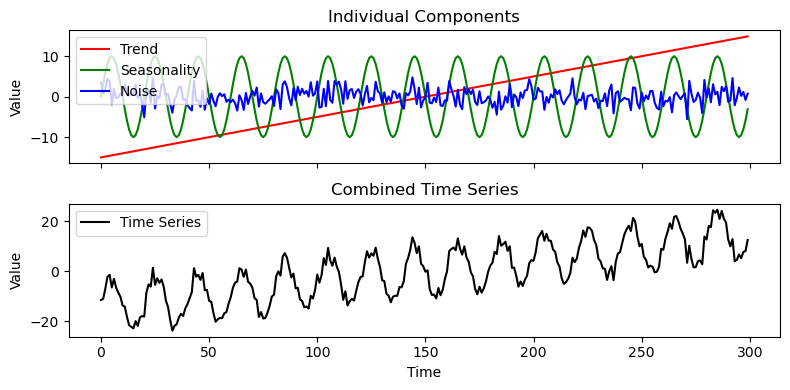

In [9]:
# Set the random seed for reproducibility
np.random.seed(0)
# Create a time index from 0 to 299
time = np.arange(300)
# Generate a linear trend starting at -10 with the same slope
trend = 0.1 * time - 15  # This will start at -10 and increase with the same slope
# Generate a seasonal component with a period of 20
seasonal = 10 * np.sin(2 * np.pi * time / 20)
# Generate some random noise
noise = np.random.normal(scale=2, size=300)

# Combine these components to form the time series
series = trend + seasonal + noise

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 4), sharex=True)
# Plot components in the first subplot
ax1.plot(time, trend, color='red', label='Trend')
ax1.plot(time, seasonal, color='green', label='Seasonality')
ax1.plot(time, noise, color='blue', label='Noise')
ax1.set_ylabel('Value')
ax1.legend()
ax1.set_title('Individual Components')

# Plot combined time series in the second subplot
ax2.plot(time, series, color='black', linewidth=1.5, label='Time Series')
ax2.set_xlabel('Time')
ax2.set_ylabel('Value')
ax2.legend()
ax2.set_title('Combined Time Series')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

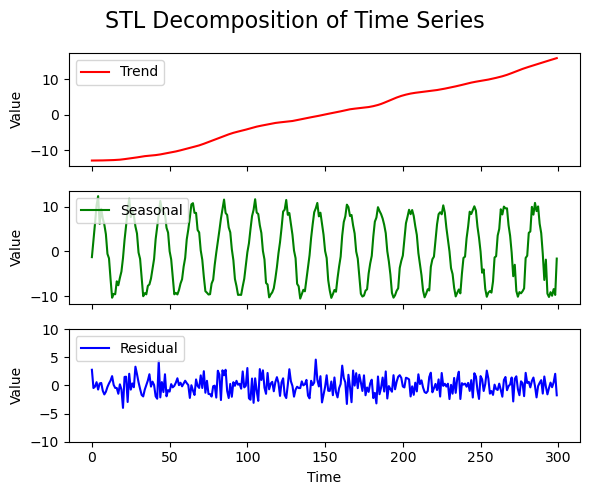

In [10]:
# Perform STL decomposition of the time series
stl = STL(series, period=20)
result = stl.fit()

# Create a plot with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 5), sharex=True)
fig.suptitle('STL Decomposition of Time Series', fontsize=16)

# Plot trend component
ax1.plot(time, result.trend, color='red', label='Trend')
ax1.set_ylabel('Value')
ax1.legend(loc='upper left')

# Plot seasonal component
ax2.plot(time, result.seasonal, color='green', label='Seasonal')
ax2.set_ylabel('Value')
ax2.legend(loc='upper left')

# Plot residual component (noise)
ax3.plot(time, result.resid, color='blue', label='Residual')
ax3.set_xlabel('Time')
ax3.set_ylabel('Value')
ax3.set_ylim(-10, 10)  # Set y-axis limits for residual plot
ax3.legend(loc='upper left')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

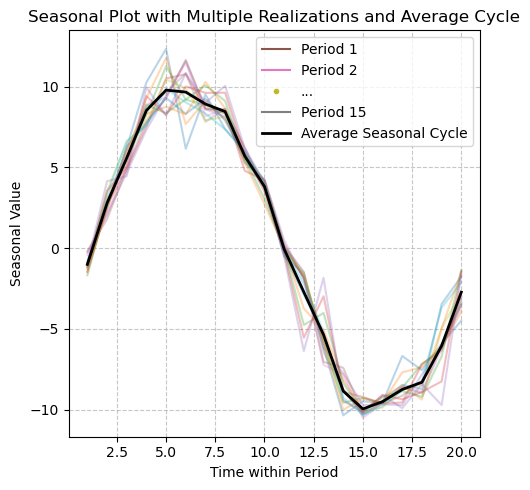

In [11]:
# Assuming 'result' is the output from STL decomposition
# Extract the seasonal and trend components
seasonal = result.seasonal
detrended = series - result.trend

# Define the period (e.g., 20 as in the STL decomposition)
period = 20

# Reshape the seasonal component into realizations of each period
n_periods = len(seasonal) // period
seasonal_reshaped = seasonal[:n_periods * period].reshape(n_periods, period)

# Calculate the average seasonal cycle
average_seasonal = np.mean(seasonal_reshaped, axis=0)

# Create the seasonal plot
plt.figure(figsize=(5, 5))

# Plot individual seasonal cycles
for i in range(n_periods):
    plt.plot(np.arange(1, period + 1), seasonal_reshaped[i], alpha=0.3)

# Plot the average seasonal cycle
average_line = plt.plot(np.arange(1, period + 1), average_seasonal, color='black', linewidth=2, label='Average Seasonal Cycle')

plt.title('Seasonal Plot with Multiple Realizations and Average Cycle')
plt.xlabel('Time within Period')
plt.ylabel('Seasonal Value')

# Customize the legend
if n_periods > 2:
    first_line = plt.plot([], [], label='Period 1')  # Empty plot for legend
    second_line = plt.plot([], [], label='Period 2')  # Empty plot for legend
    last_line = plt.plot([], [], label=f'Period {n_periods}')  # Empty plot for legend
    dots_line = plt.plot([], [], label='...', linestyle='None', marker='.')  # Dots for ...
    plt.legend(handles=first_line + second_line + dots_line + last_line + average_line)
else:
    plt.legend()

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

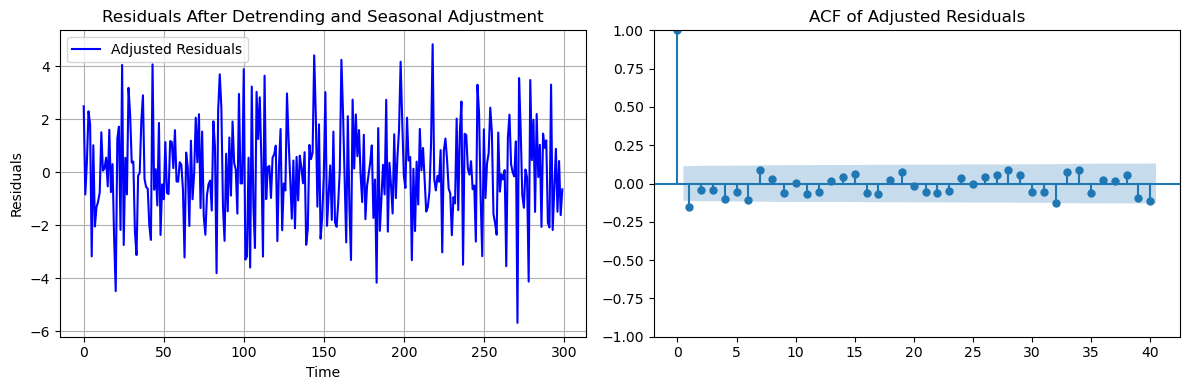

In [12]:
# Assuming the previous STL decomposition has been performed and we have the 'result' object
# Extract the trend component from the STL decomposition
trend = result.trend

# Detrend the original series by subtracting the trend component
detrended_series = series - trend

# Repeat the average seasonal cycle to match the length of the original series
average_seasonal_cycle = np.tile(average_seasonal, 15)

# Adjust the detrended series for seasonality by subtracting the repeated average seasonal cycle
residuals = detrended_series - average_seasonal_cycle

# Create a figure with two subplots horizontally arranged
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Subplot 1: Plot the resulting residuals
axs[0].plot(residuals, label='Adjusted Residuals', color='blue')
axs[0].set_title('Residuals After Detrending and Seasonal Adjustment')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Residuals')
axs[0].grid(True)
axs[0].legend()

# Subplot 2: Plot the ACF of the new residuals to assess autocorrelation
plot_acf(residuals, lags=40, alpha=0.05, ax=axs[1])
axs[1].set_title('ACF of Adjusted Residuals')

# Adjust layout to ensure no overlap
plt.tight_layout()
plt.show()

### Perform the Ljung-Box test
To test if the residual series is a white noise.

In [13]:
# Statistical Tests: Ljung-Box test for autocorrelation
# Perform the Ljung-Box test on the residuals
ljung_box_results = acorr_ljungbox(residuals, lags=[20], return_df=True)

print("Ljung-Box test results:")
print(ljung_box_results)

Ljung-Box test results:
      lb_stat  lb_pvalue
20  28.643441   0.095021
